# **Pertemuan 4: Join Probability Distribution**
<hr>

### By: Andreas Syaloom Kurniawan (552751)

In [1]:
# The note is written in english do to my class lecture notes was written in english, 
# therefore to make my english more fluent I also write this notebook in english.
# The code are based on R programming language

# Table of Contents
- [A. Bivariate Distribution](#a)
    - [A. 1 Join Probability Distribution](#a.1)
    - [A. 2 Marginal Distribution Function](#a.2)
    - [A. 3 Conditional Probability Distribution](#a.3)
- [B. Covariance and Correlation](#b)
    - [B. 1 Covariance and Correlation](#b.1)
    - [B. 2 Sums of Random Variable](#b.2)

*Unfortunately, under github the link for the table of contents doesnt work, hence you need to scroll to the part if you want to go to a specific part of the note.*

## **A. Bivariate Distribution**<a class="anchor" id="a"></a>
<hr>

## **A.1 Join Probability Distribution**<a class="anchor" id="a"></a>

**Definition:**

1. Let $X$ and $Y$ be random variables. If both $X$ and $Y$ are discrete then $f(x,y) = P(X=x, Y=y)$
2. If both $X$ and $Y$ are contionous then $f(x,y)$ is called the joint probability density function (joint pdf) of X and Y if and only if
   $$
   \Huge
   P(a\leq X \leq b, c\leq Y \leq d) = \int_a^b \int_c^d f(x,y) dy dx 
   $$

**Theorem:**

If $X$ and $Y$ are two random variables with joint probability function $f(x, y)$, then  
1. $f(x, y) \geq 0$ for all $x$ and $y$.  
2. If $X$ and $Y$ are discrete, then  
   $$
   \sum_{x,y} f(x, y) = 1
   $$
3. If $X$ and $Y$ are continuous, then  
   $$
   \iint f(x, y) \,dx \,dy = 1.
   $$

**Example of Join Random Variable:**

1. **Both Discrete**
 
Let X and Y be two discrete random variables represent,
* $X$ = number of courses taken by Master of Economics Course in UGM.
* $Y$ = number of hours spent (in a day) for these courses (the hours will be in integer).
  
Then we can generate a joint discrete random variable of $X$ and $Y$.

2. **Both Contionous**
Let X and Y be two discrete random variables represent,
* $X$ = daily temperature of Yogyakarta city (in Celcius)
* $Y$ = the precipitation of Yogyakarta city (in mm).
  
Then we can generate a joint continous random variable of $X$ and $Y$.

### Example for Discrete Joint Probability
* Suppose we open a restaurant and we sell food ("Nasi Goreng", "Nasi Lemak", "Nasi Padang", "Soto Lamongan") and drink ("Wedang Jahe", "Kopi", "Teh").
* We would like to know the joint probability distribution of the food and drink.
* By simulating $n$ times, here we set $n=1000$, we could know the distribution, as follow:

In [4]:
set.seed(2025)  # Set seed for reproducibility

# Define possible choices
food_choices <- c("Nasi Goreng", "Nasi Lemak", "Nasi Padang", "Soto Lamongan")  # X variable (4 choices)
drink_choices <- c("Wedang Jahe", "Kopi", "Teh")  # Y variable (3 choices)

# Generate a sample dataset (assuming independent choices with different probabilities)
sample_size <- 1000
food_samples <- sample(food_choices, sample_size, replace = TRUE, prob = c(0.3, 0.25, 0.25, 0.2))  # Different probabilities
drink_samples <- sample(drink_choices, sample_size, replace = TRUE, prob = c(0.4, 0.35, 0.25))  # Different probabilities

# Create a data frame
data <- data.frame(Food = food_samples, Drink = drink_samples)

# Compute frequency table
freq_table <- as.data.frame(table(data$Food, data$Drink))

# Compute joint probability
freq_table$Probability <- freq_table$Freq / sum(freq_table$Freq)

# Rename columns for clarity
colnames(freq_table) <- c("Food", "Drink", "Frequency", "Joint_Probability")

# Display the result
print(freq_table)

            Food       Drink Frequency Joint_Probability
1    Nasi Goreng        Kopi        97             0.097
2     Nasi Lemak        Kopi        70             0.070
3    Nasi Padang        Kopi        97             0.097
4  Soto Lamongan        Kopi        84             0.084
5    Nasi Goreng         Teh        67             0.067
6     Nasi Lemak         Teh        61             0.061
7    Nasi Padang         Teh        60             0.060
8  Soto Lamongan         Teh        53             0.053
9    Nasi Goreng Wedang Jahe       124             0.124
10    Nasi Lemak Wedang Jahe       105             0.105
11   Nasi Padang Wedang Jahe       104             0.104
12 Soto Lamongan Wedang Jahe        78             0.078


We can check that the total Joint Probability is 1 or not to validate the theorem that saying if $X$ and $Y$ are discrete, then  
$$
 \sum_{x,y} f(x, y) = 1
$$


In [5]:
print(paste("Total Joint Probability:", sum(freq_table$Joint_Probability)))

[1] "Total Joint Probability: 1"


We could also draw the heatmap of the joint probability using R, as follow:

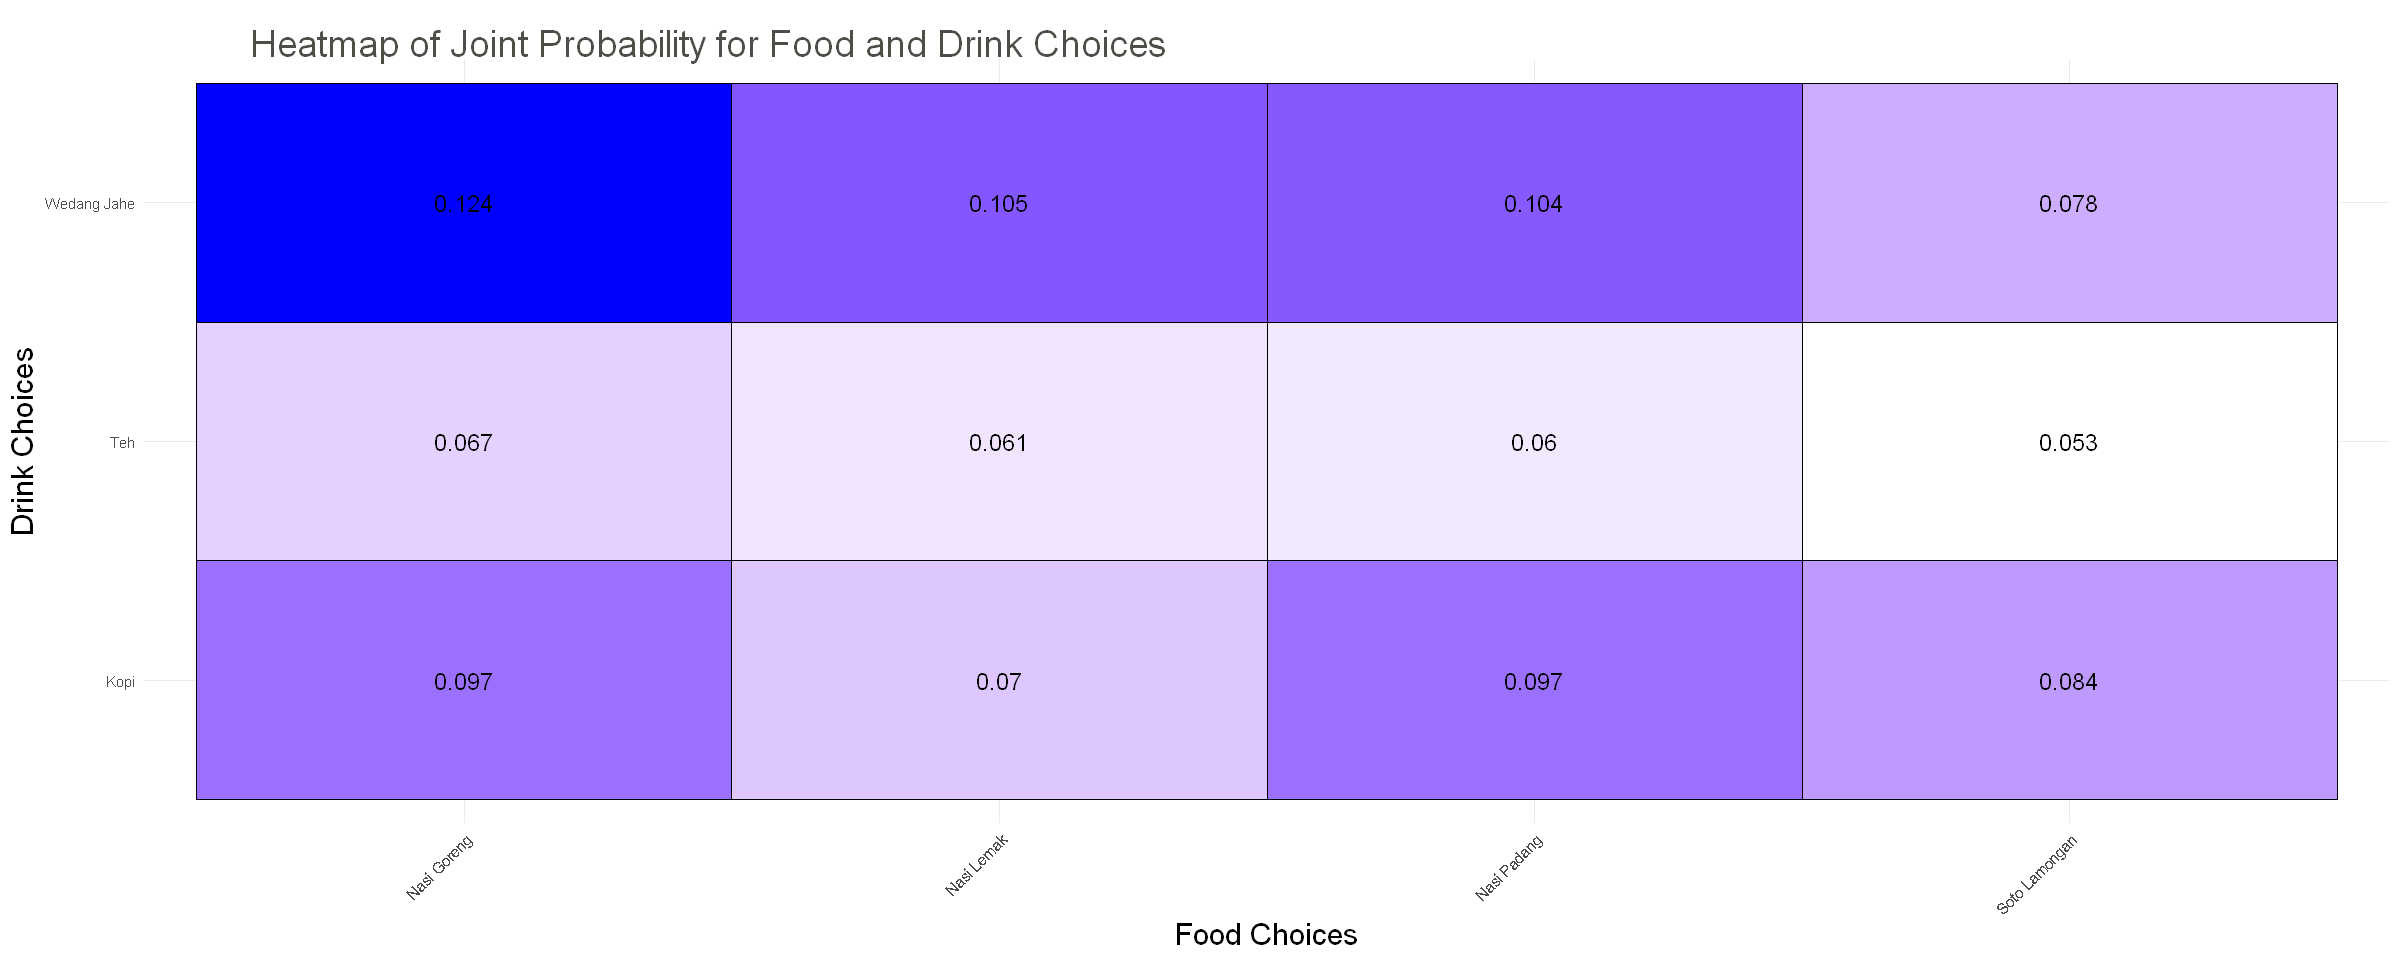

In [6]:
# Create heatmap using ggplot2
library(ggplot2)
options(repr.plot.width=20, repr.plot.height=8) # this is just to make the plots wider (extend to the end of laptop display) 
ggplot(freq_table, aes(x = Food, y = Drink, fill = Joint_Probability)) +
    geom_tile(color = "black") +  # Black border for each tile
    scale_fill_gradient(low = "white", high = "blue") +  # Color gradient from low to high probability
    geom_text(aes(label = round(Joint_Probability, 3)), size = 5) +  # Show probability values
    labs(title = "Heatmap of Joint Probability for Food and Drink Choices",
         x = "Food Choices", y = "Drink Choices", fill = "Joint Probability") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+  # Rotate x-axis labels for readability
    theme(legend.position = "none",  
        plot.title = element_text(size= 22, hjust=0.01, color = "#4e4d47", margin = margin(b = -0.1, t = 0.4, l = 2, unit = "cm")),
        plot.subtitle = element_text(size= 16, hjust=0.01, color = "#4e4d47", margin = margin(b = -0.1, t = 0.43, l = 2, unit = "cm")),
        axis.title.x = element_text(size = 18), # Perbesar teks sumbu X
        axis.title.y = element_text(size = 18)) # Perbesar teks sumbu Y)  

**Example for Continous Join Distribution: Rainfall and Temperature**

We analyze the relationship between **daily rainfall (mm) and temperature (°C)** in a city using a **joint probability density function (PDF)**.

Let:

- $X$ = Rainfall (in mm) on a given day, with $0 \leq X \leq 10$.
- $Y$ = Temperature (in °C) on that same day, with $0 \leq Y \leq 40$.

The PDF  function will represent by a **simple linear function**:
$$
f(x, y) = 0.00714(1 - 0.05x - 0.02y)
$$
for $0 \leq x \leq 10$, $0 \leq y \leq 40$.

Compute the probability that **rainfall is less than 5 mm and temperature is between 20°C and 30°C**:
   $$
   P(0 \leq X \leq 5, 20 \leq Y \leq 30) = \int_0^5 \int_{20}^{30} f(x, y) \, dy \, dx.
   $$

In [7]:
# Load necessary library
library(pracma)  # For numerical integration

# Define the joint probability density function (PDF)
f_xy <- function(x, y) {
  0.00714 * (1 - 0.05*x - 0.02*y)
}

# Define integration bounds
x_lower <- 0
x_upper <- 5
y_lower <- 20
y_upper <- 30

# Compute the double integral
result <- integral2(f_xy, xmin = x_lower, xmax = x_upper, ymin = y_lower, ymax = y_upper)

# Print the result
cat("P(0 ≤ X ≤ 5, 20 ≤ Y ≤ 30) =", result$Q, "\n")

Warning message:
"package 'pracma' was built under R version 4.4.2"


P(0 ≤ X ≤ 5, 20 ≤ Y ≤ 30) = 0.133875 


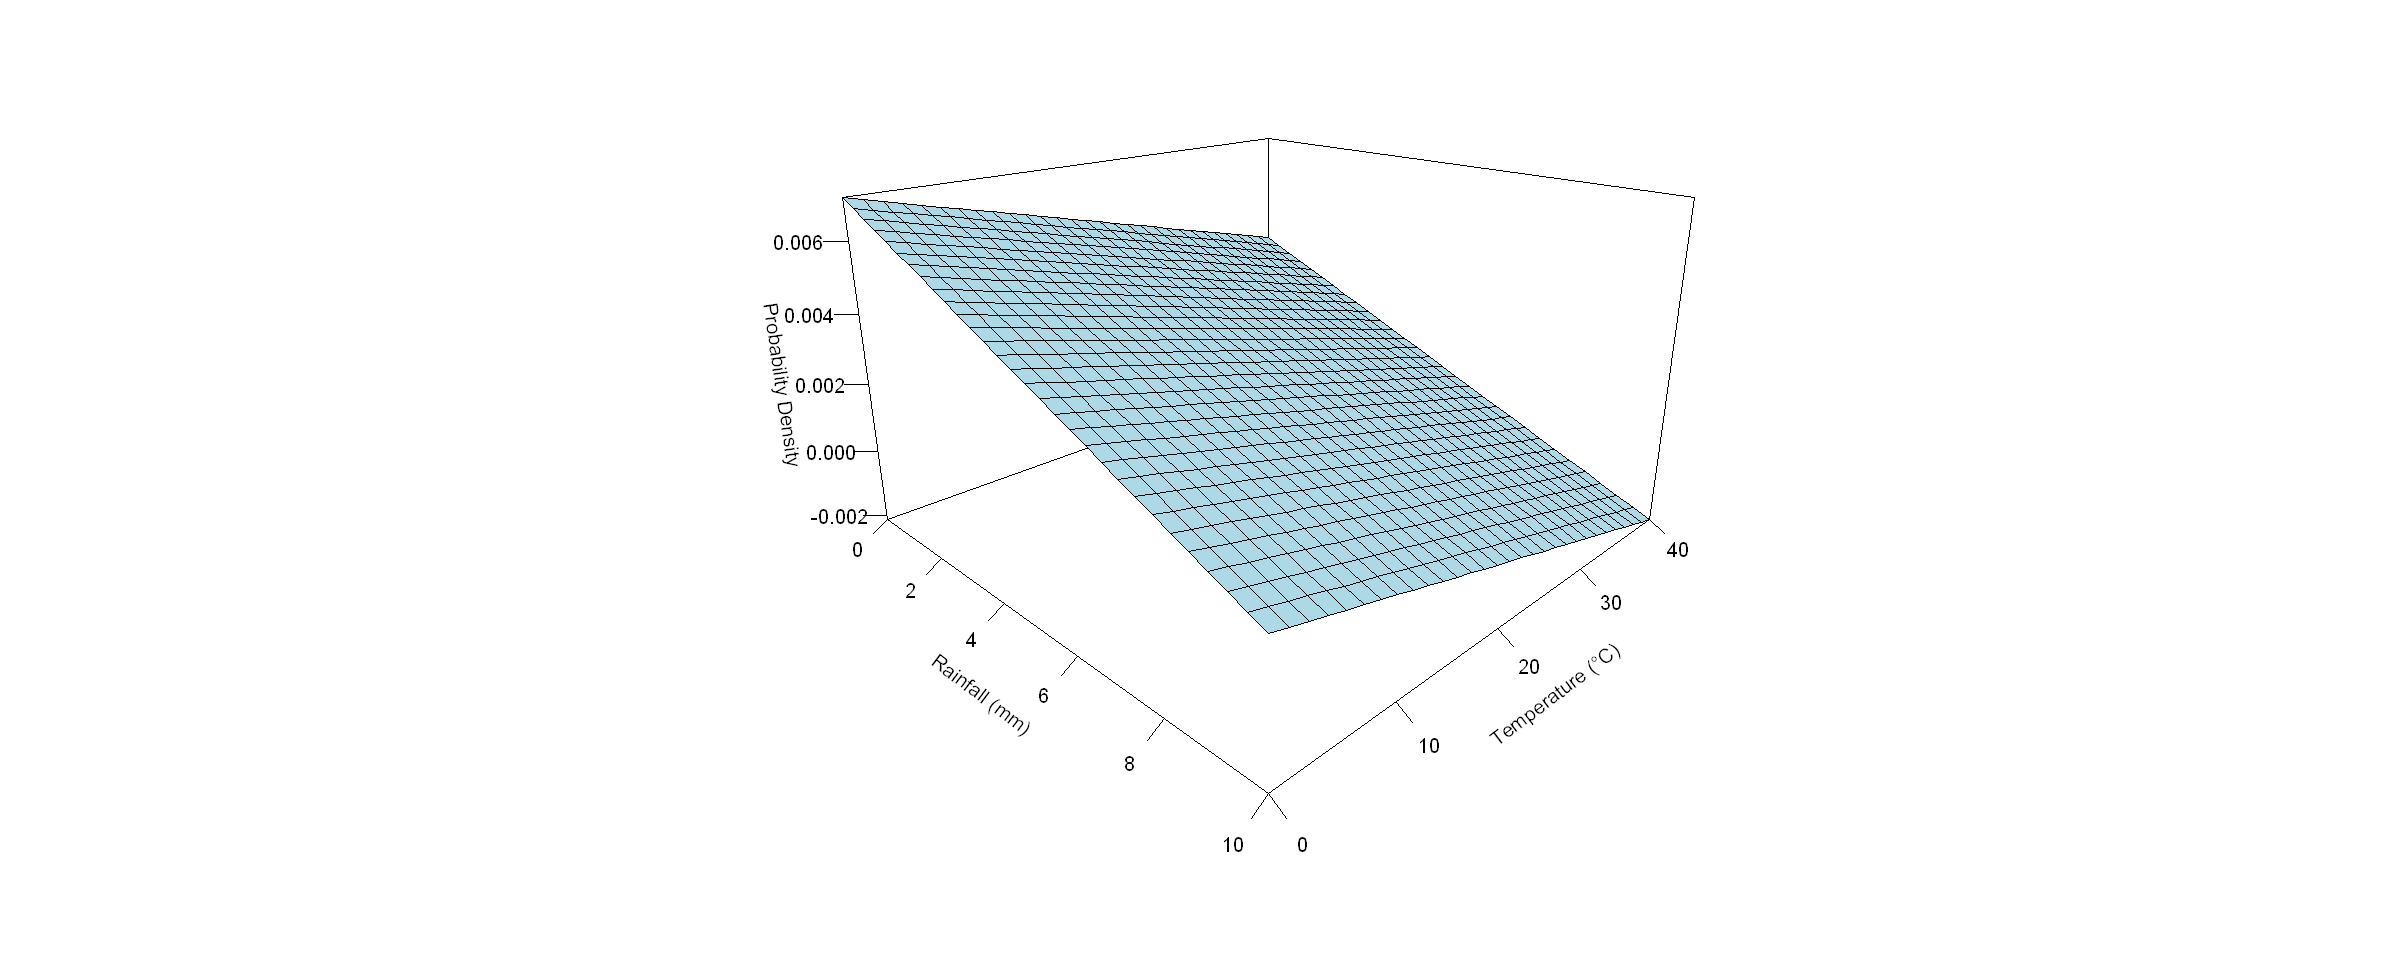

In [9]:
# Load necessary libraries
library(plot3D)

# Define x and y values
x_vals <- seq(0, 10, length.out = 30)
y_vals <- seq(0, 40, length.out = 30)

# Create grid
grid <- expand.grid(X = x_vals, Y = y_vals)

# Compute f(x, y)
grid$Z <- with(grid, 0.00714 * (1 - 0.05*X - 0.02*Y))

# Convert to matrix for plotting
Z_matrix <- matrix(grid$Z, nrow = length(x_vals), ncol = length(y_vals), byrow = TRUE)

# 3D Surface Plot
persp3D(x = x_vals, y = y_vals, z = Z_matrix, col = "lightblue",
        xlab = "Rainfall (mm)", ylab = "Temperature (°C)", zlab = "Probability Density",
        theta = 45, phi = 20, expand = 0.6, border = "black",
        ticktype = "detailed")  # Ensures proper tick marks on the axes


## **A.2 Marginal Distribution Function**<a class="anchor" id="a"></a>

* "Marginalizing" means **ignoring other variables** by summing or integrating.
* It helps us understand individual distributions without considering the full joint distribution.

## A.2.1 Discrete Distribution
Marginal PMF of $x$
\begin{align}
f_X(x) &= \sum_{\text{all } x} f(x, y), && \text{if } X \text{ and } Y \text{ are discrete}
\end{align}
Marginal PMF of $y$
\begin{align}
f_Y(y) &= \sum_{\text{all } y} f(x, y), && \text{if } X \text{ and } Y \text{ are discrete}
\end{align}

**Example For Discrete Random Variable:**

From example above 
* Compute the marginal PMF $f_X(x)$(marginal probability of each food choice).
* Compute the marginal PMF $f_Y(y)$( (marginal probability of each drink choice).
* Find the probability of ordering Nasi Goreng, regardless of drink choice.
* Find the probability of ordering Teh, regardless of food choice.

In [10]:
# Convert frequency table to joint probability matrix
joint_prob_matrix <- xtabs(Joint_Probability ~ Food + Drink, data = freq_table)

# Print joint probability matrix
cat("\nJoint Probability Matrix:\n")
print(joint_prob_matrix)


Joint Probability Matrix:
               Drink
Food             Kopi   Teh Wedang Jahe
  Nasi Goreng   0.097 0.067       0.124
  Nasi Lemak    0.070 0.061       0.105
  Nasi Padang   0.097 0.060       0.104
  Soto Lamongan 0.084 0.053       0.078


In [11]:
# Compute marginal probability of food choices
marginal_food <- rowSums(joint_prob_matrix)

# Compute marginal probability of drink choices
marginal_drink <- colSums(joint_prob_matrix)

# Print marginal probabilities
cat("\nMarginal Probability of Food Choices:\n")
print(marginal_food)

cat("\nMarginal Probability of Drink Choices:\n")
print(marginal_drink)



Marginal Probability of Food Choices:
  Nasi Goreng    Nasi Lemak   Nasi Padang Soto Lamongan 
        0.288         0.236         0.261         0.215 

Marginal Probability of Drink Choices:
       Kopi         Teh Wedang Jahe 
      0.348       0.241       0.411 


In [12]:
# Compute marginal probability of ordering Nasi Goreng (sum over all drinks)
P_Nasi_Goreng <- sum(joint_prob_matrix["Nasi Goreng", ])

# Compute marginal probability of ordering Teh (sum over all foods)
P_Teh <- sum(joint_prob_matrix[, "Teh"])

# Print results
cat("\nP(X = Nasi Goreng):", P_Nasi_Goreng, "\n")
cat("\nP(Y = Teh):", P_Teh, "\n")


P(X = Nasi Goreng): 0.288 

P(Y = Teh): 0.241 


## Interpretation
* Marginal Probability of Food Choices

These probabilities represent how often each food item is chosen, regardless of the drink choice.
- Nasi Goreng: 28.8% of the time
- Nasi Lemak: 23.6% of the time
- Nasi Padang: 26.1% of the time
- Soto Lamongan: 21.5% of the time

This tells us that Nasi Goreng is the most popular choice, while Soto Lamongan is the least chosen.

* Marginal Probability of Drink Choices

These probabilities represent how often each drink is chosen, regardless of the food choice.
* Kopi: 34.8% of the time
* Teh: 24.1% of the time
* Wedang Jahe: 41.1% of the time

Wedang Jahe is the most popular drink, while Teh is the least chosen.

### A.2.2. Continous Distribution
Marginal PDF of $x$
$$
\begin{align*}
f_Y(y) =& \int_{-\infty}^\infty f(x, y) \, dy, & \text{if } X \text{ and } Y \text{ are continuous} \\
\end{align*}
$$
Marginal PDF of $y$
$$
\begin{align*}
f_Y(y) =& \int_{-\infty}^\infty f(x, y) \, dy, & \text{if } X \text{ and } Y \text{ are continuous} \\
\end{align*}
$$

* **EXAMPLE OF CONTIONOUS RANDOM VARIABLE :**

1. Compute the marginal PDF $f_X(x)$ (marginal probability of rainfall).
2. Compute the marginal PDF $f_Y(y)$ (marginal probability of temperature).
3. Find the probability that rainfall is between 3 mm and 6 mm, regardless of temperature.
4. Find the probability that the temperature is between 25°C and 35°C, regardless of rainfall.

**ANSWER:**

The given **joint probability density function (PDF)** is:

$$
f(x,y) = 0.00714(1 - 0.05x - 0.02y), \quad 0 \leq x \leq 10, \quad 0 \leq y \leq 40.
$$

We will compute the **marginal PDFs** by integrating out one of the variables.

1. The **marginal probability density function (PDF)** for rainfall $X$ is obtained by integrating out $Y$:

$$
f_X(x) = \int_0^{40} f(x, y) \, dy
$$

Substituting the given joint PDF:

$$
f_X(x) = \int_0^{40} 0.00714(1 - 0.05x - 0.02y) \, dy
$$

Evaluating the integral:

$$
f_X(x) = 0.17136 - 0.01428x, \quad 0 \leq x \leq 10
$$

2. The **marginal PDF for temperature $Y$** is:

$$
f_Y(y) = \int_0^{10} f(x, y) \, dx
$$

Substituting the joint PDF:

$$
f_Y(y) = \int_0^{10} 0.00714(1 - 0.05x - 0.02y) \, dx
$$

Evaluating the integral:

$$
f_Y(y) = 0.05355 - 0.001428y, \quad 0 \leq y \leq 40
$$



3. The probability that rainfall is between 3 mm and 6 mm, regardless of temperature.
4. The probability that the temperature is between 25°C and 35°C, regardless of rainfall.

In [13]:
# Load necessary library
library(pracma)  # For numerical integration

# Define the marginal PDF of rainfall (X)
f_x <- function(x) {
  return(0.17136 - 0.01428*x)
}

# Define the marginal PDF of temperature (Y)
f_y <- function(y) {
  return(0.05355 - 0.001428*y)
}

# Compute probability that rainfall is between 3 mm and 6 mm
P_rainfall <- integral(f_x, 3, 6)

# Compute probability that temperature is between 25°C and 35°C
P_temperature <- integral(f_y, 25, 35)

# Print results
cat("Probability that rainfall is between \nP(3 ≤ X ≤ 6):", P_rainfall, "\n")
cat("Probability that the temperature is between \nP(25 ≤ Y ≤ 35):", P_temperature, "\n")

Probability that rainfall is between 
P(3 ≤ X ≤ 6): 0.3213 
Probability that the temperature is between 
P(25 ≤ Y ≤ 35): 0.1071 


## **A.3 Conditional Probability Distribution**<a class="anchor" id="a"></a>

A conditional probability distribution describes the probability distribution of a random variable, given that another variable is known or fixed.
- In **discrete** cases, we divide probabilities:  
  $ P(X | Y) = \frac{P(X, Y)}{P(Y)} $
- In **continuous** cases, we divide PDFs:  
  $ f_{X|Y}(x | y) = \frac{f(X, Y)}{f_Y(y)} $


**Example:**

* Compute the conditional probability of ordering "Kopi" given that the customer ordered "Nasi Goreng".
* Compute the conditional probability of ordering "Nasi Lemak" given that the customer ordered "Wedang Jahe".

In [14]:
# Compute conditional probability of ordering Kopi given that the customer ordered Nasi Goreng
P_Kopi_given_NasiGoreng <- joint_prob_matrix["Nasi Goreng", "Kopi"] / marginal_food["Nasi Goreng"]

# Compute conditional probability of ordering Nasi Lemak given that the customer ordered Wedang Jahe
P_NasiLemak_given_WedangJahe <- joint_prob_matrix["Nasi Lemak", "Wedang Jahe"] / marginal_drink["Wedang Jahe"]

# Print results
cat("\nP(Y = Kopi | X = Nasi Goreng):", P_Kopi_given_NasiGoreng, "\n")
cat("\nP(X = Nasi Lemak | Y = Wedang Jahe):", P_NasiLemak_given_WedangJahe, "\n")


P(Y = Kopi | X = Nasi Goreng): 0.3368056 

P(X = Nasi Lemak | Y = Wedang Jahe): 0.2554745 


**Example:**

1. Compute the conditional probability density function of rainfall given that temperature is 25°C.
2. Compute the conditional probability that the rainfall is less than 4 mm given that the temperature is 25°C.

1. The conditional probability density function of rainfall given that temperature is 25°C.

Remember
a. **Joint PDF:**
   $$
   f(X, Y) = 0.00714(1 - 0.05x - 0.02y)
   $$

b. **Marginal PDF of \( Y \):**
   $$
   f_Y(y) = 0.05355 - 0.001428y
   $$

c. **Substituting into the Conditional PDF Formula:**
   $$
   f_{X|Y}(x | y) = \frac{0.00714(1 - 0.05x - 0.02y)}{0.05355 - 0.001428y}
   $$

d. **Evaluating for $Y = 25$**

   
If we set $y = 25$:

$$
f_{X|Y}(x | 25) = \frac{0.00714(1 - 0.05x - 0.02(25))}{0.05355 - 0.001428(25)}
$$

$$
= \frac{0.00714(1 - 0.05x - 0.5)}{0.05355 - 0.0357}
$$

$$
= \frac{0.00714(0.5 - 0.05x)}{0.01785}
$$

Simplifying:

$$
f_{X|Y}(x | 25) = -0.02x + 0.2, \quad 0 \leq x \leq 10
$$


In [15]:
# Define the limits of integration
lower_limit <- 0
upper_limit <- 4

# Define the conditional PDF
conditional_pdf <- function(x) {
  return(-0.02 * x + 0.2)
}

# Compute the integral using the integrate function
result <- integrate(conditional_pdf, lower_limit, upper_limit)
result$value

[1] 0.64

* Therefore, the conditional probability that the rainfall is less than 4 mm given that the temperature is 25°C is 0.64. 
* This means there is a 64% chance that the rainfall will be less than 4 mm when the temperature is 25°C.

# **B. Covariance and Correlation**

### **Definition**
#### **(i) Covariance**
The **covariance** between two random variables  $X$ and $Y$ is defined by:

$$
\begin{align}
\sigma_{XY} =& \text{Cov}(X, Y) \\
=& E[(X - \mu_X)(Y - \mu_Y)] \\ 
=& E[XY] - \mu_X \mu_Y \\
\end{align}
$$

where $\mu_X = E(X)$ and $\mu_Y = E(Y)$.

#### **(ii) Correlation Coefficient**
The **correlation coefficient**  $\rho$ or $\rho(X, Y)$ is defined by:

$$
\rho = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X) \text{Var}(Y)}}.
$$


### Interesting Problem

* Compute the covariance between nasi padang and kopi.
* Compute the correlation coefficient.

In [31]:
# Probabilities for Nasi Lemak and Kopi from your data
nasi_lemak <- c(0.07, 0.061, 0.105, 0.104)  
kopi <- c(0.097, 0.067, 0.06, 0.053)

# Calculate covariance
covariance_nlemak_kopi <- cov(nasi_lemak, kopi)
cat("\nCovariance Between Nasi Lemak and Kopi:", covariance_nlemak_kopi, "\n")

# Calculate the correlation coefficient
correlation_nl_kopi <- cor(nasi_lemak, kopi)
cat("\nCoefficient Correlation Between Nasi Lemak and Kopi:", correlation_nl_kopi, "\n")


Covariance Between Nasi Lemak and Kopi: -0.0002853333 

Coefficient Correlation Between Nasi Lemak and Kopi: -0.6458107 


# **A.3  Sums of Random Variable**



There will be a time in economics where we need to sums two random variable. These are two example where we need the sum of two random variable.

## **1. Total Income and Wealth**

In economics, an individual’s **total income** is often the sum of multiple sources. Suppose an individual has:

- \( X \) = Salary (random variable)
- \( Y \) = Investment Returns (random variable)

The total income is given by:

$$
Z = X + Y
$$

### **Expectation and Variance of Total Income**
- **Expected total income**:
  $$
  E(Z) = E(X) + E(Y)
  $$
- **Variance of total income**:
  $$
  \text{Var}(Z) = \text{Var}(X) + \text{Var}(Y) + 2\text{Cov}(X, Y)
  $$

In [39]:
### **R Simulation: Summing Two Income Sources**

set.seed(123)  # Reproducibility

# Simulate two income sources (Normal distribution)
X <- rnorm(1000, mean = 50000, sd = 10000)  # Salary
Y <- rnorm(1000, mean = 10000, sd = 5000)   # Investment Returns

# Compute total income
Z <- X + Y

# Compute expected values and variance
E_X <- mean(X)
E_Y <- mean(Y)
E_Z <- mean(Z)

Var_X <- var(X)
Var_Y <- var(Y)
Var_Z <- var(Z)
Cov_XY <- cov(X, Y)

# Print results
cat("\nE(X):", E_X, "E(Y):", E_Y, "E(Z):", E_Z, "\n")
cat("\nVar(X):", Var_X, "Var(Y):", Var_Y, "Var(Z):", Var_Z, "\n")
cat("\nCov(X, Y):", Cov_XY, "\n")



E(X): 50161.28 E(Y): 10212.33 E(Z): 60373.6 

Var(X): 98345893 Var(Y): 25486049 Var(Z): 132491031 

Cov(X, Y): 4329545 


## **2. Portfolio Returns (Finance & Investment)**

In finance, total portfolio returns are the **sum of individual asset returns**. Suppose an investor holds:

- \( X \) = Stock returns (random variable)
- \( Y \) = Bond returns (random variable)

The total portfolio return is:

$$
R = X + Y
$$

### **Expectation and Risk of Portfolio Returns**

- **Expected return:**
  $$
  E(R) = E(X) + E(Y)
  $$

- **Portfolio variance:**
  $$
  \text{Var}(R) = \text{Var}(X) + \text{Var}(Y) + 2\text{Cov}(X, Y)
  $$

In [40]:
set.seed(123)  # Reproducibility

# Simulate stock and bond returns (Normal distribution)
X <- rnorm(1000, mean = 0.08, sd = 0.15)  # Stock returns (8% avg, 15% risk)
Y <- rnorm(1000, mean = 0.03, sd = 0.05)  # Bond returns (3% avg, 5% risk)

# Compute total portfolio return
R <- X + Y

# Compute expected values and variance
E_X <- mean(X)
E_Y <- mean(Y)
E_R <- mean(R)

Var_X <- var(X)
Var_Y <- var(Y)
Var_R <- var(R)
Cov_XY <- cov(X, Y)

# Print results
cat("\nE(X):", E_X, "E(Y):", E_Y, "E(R):", E_R, "\n")
cat("\nVar(X):", Var_X, "Var(Y):", Var_Y, "Var(R):", Var_R, "\n")
cat("\nCov(X, Y):", Cov_XY, "\n")



E(X): 0.08241918 E(Y): 0.03212326 E(R): 0.1145424 

Var(X): 0.02212783 Var(Y): 0.002548605 Var(R): 0.02597529 

Cov(X, Y): 0.0006494317 


In [ ]:
#################################################################### END #########################################################################################################